In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')


1.Sınavlardaki performans cinsiyete, kökene ve anne-baba eğitim durumuna göre değişiklik göstermekte midir?

2.Öğle yemek tipinin sınav performansları ile bir ilişkisi var mı? Varsa bunu nasıl açıklayabilirsiniz?

3.Hazırlık kurslarının sonav performansı üzerinde bir etkisi var mı?

4.Birbiriyle korelasyonu en fazla olan dersler hangisidir?

In [4]:
sinavlarda_ogrenci = pd.read_csv("StudentsPerformance.csv")
sinavlarda_ogrenci.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


1.Sınavlardaki performans cinsiyete, kökene ve anne-baba eğitim durumuna göre değişiklik göstermekte midir?

In [7]:
sinavlarda_ogrenci['performance'] = (sinavlarda_ogrenci['math score'] + sinavlarda_ogrenci['reading score']+ sinavlarda_ogrenci['writing score']).astype(int)
sinavlarda_ogrenci.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,performance
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [17]:
sinavlarda_ogrenci.corr()

,math score,reading score,writing score,performance
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
performance,0.918746,0.970331,0.965667,1.000000


In [20]:
sinavlarda_ogrenci.groupby("gender").mean()

,math score,reading score,writing score,performance
gender,,,,
female,63.633205,72.608108,72.467181,208.708494
male,68.728216,65.473029,63.311203,197.512448


In [22]:
sinavlarda_ogrenci.groupby("race/ethnicity").mean()

,math score,reading score,writing score,performance
race/ethnicity,,,,
group A,61.629213,64.674157,62.674157,188.977528
group B,63.452632,67.352632,65.600000,196.405263
group C,64.463950,69.103448,67.827586,201.394984
group D,67.362595,70.030534,70.145038,207.538168
group E,73.821429,73.028571,71.407143,218.257143


In [23]:
sinavlarda_ogrenci.groupby("parental level of education").mean()

,math score,reading score,writing score,performance
parental level of education,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207
bachelor's degree,69.389831,73.000000,73.381356,215.771186
high school,62.137755,64.704082,62.448980,189.290816
master's degree,69.745763,75.372881,75.677966,220.796610
some college,67.128319,69.460177,68.840708,205.429204
some high school,63.497207,66.938547,64.888268,195.324022


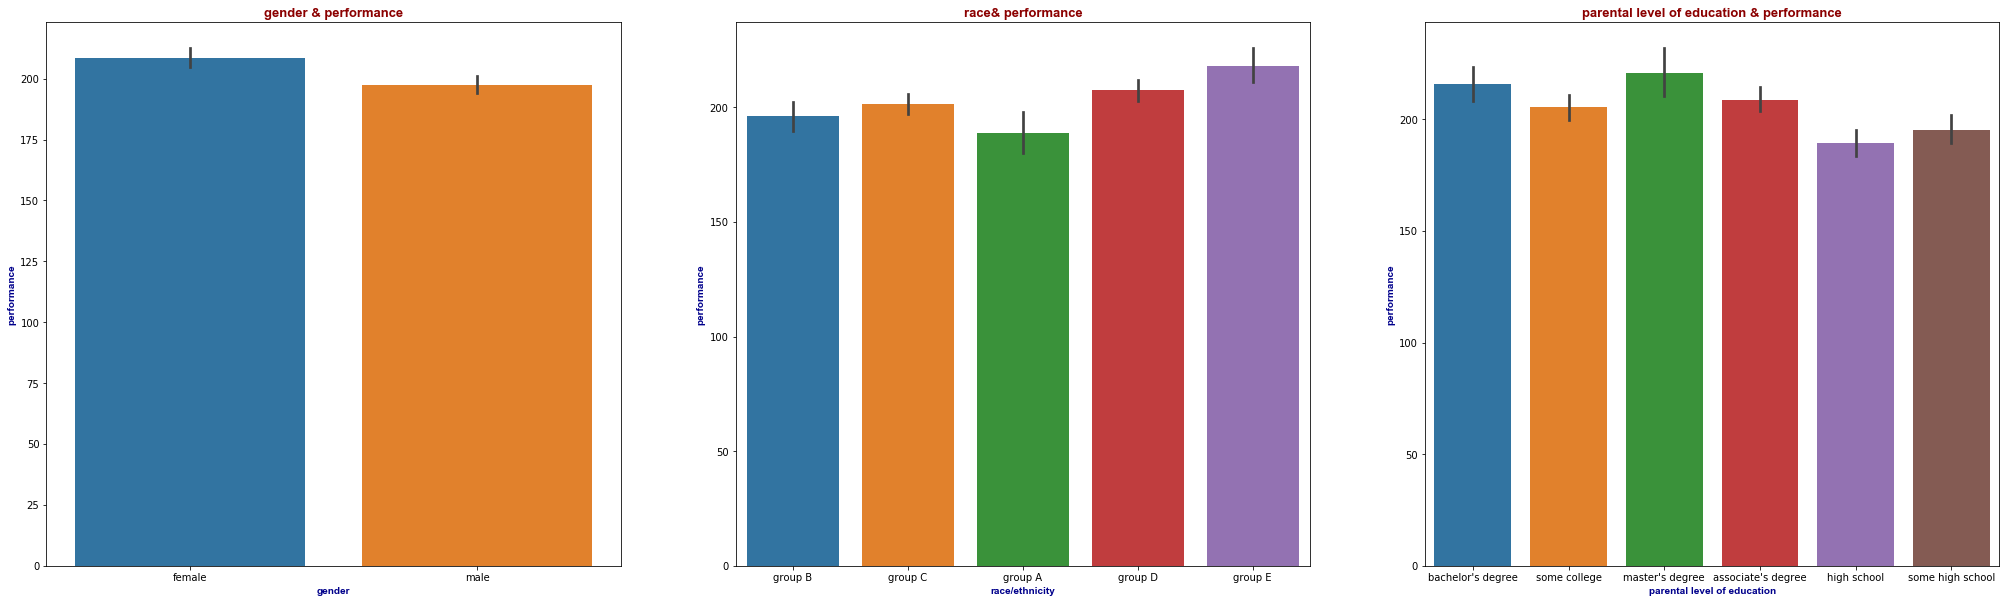

In [30]:
plt.figure(figsize=(35,10))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
sns.barplot(sinavlarda_ogrenci["gender"], sinavlarda_ogrenci["performance"])
plt.title("gender & performance", fontdict=baslik_font)
plt.xlabel('gender', fontdict=eksen_font )
plt.ylabel('performance', fontdict=eksen_font )


plt.subplot(1,3,2)
sns.barplot(sinavlarda_ogrenci["race/ethnicity"], sinavlarda_ogrenci["performance"])
plt.title("race& performance", fontdict=baslik_font)
plt.xlabel('race/ethnicity', fontdict=eksen_font )
plt.ylabel('performance', fontdict=eksen_font )

plt.subplot(1,3,3)
sns.barplot(sinavlarda_ogrenci["parental level of education"], sinavlarda_ogrenci["performance"])
plt.title("parental level of education & performance", fontdict=baslik_font)
plt.xlabel('parental level of education', fontdict=eksen_font )
plt.ylabel('performance', fontdict=eksen_font )

plt.show()

2.Öğle yemek tipinin sınav performansları ile bir ilişkisi var mı? Varsa bunu nasıl açıklayabilirsiniz?


In [37]:
# Test whether group differences are significant.
performance2 = sinavlarda_ogrenci["performance"].unique()

In [40]:
# Test whether group differences are significant.
grup_sinavda_ogrenci = sinavlarda_ogrenci.groupby("performance")


In [41]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["performance", "lunch"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(performance2)):
        for j in range(i+1, len(performance2)):
            ttest = stats.ttest_ind(sinavlarda_ogrenci[sinavlarda_ogrenci["performance"]==performance2[i]][var],
                                sinavlarda_ogrenci[sinavlarda_ogrenci["performance"]==performance2[j]][var])
            grup_1 = performance2[i]
            grup_2 = performance2[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

performance için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,218.000000000000000,247.000000000000000,-inf,0.000000000000000
1,218.000000000000000,278.000000000000000,-inf,0.000000000000000
2,218.000000000000000,148.000000000000000,inf,0.000000000000000
3,218.000000000000000,229.000000000000000,-inf,0.000000000000000
4,218.000000000000000,232.000000000000000,-inf,0.000000000000000
5,218.000000000000000,275.000000000000000,-inf,0.000000000000000
6,218.000000000000000,122.000000000000000,inf,0.000000000000000
7,218.000000000000000,195.000000000000000,inf,0.000000000000000
8,218.000000000000000,164.000000000000000,inf,0.000000000000000
9,218.000000000000000,135.000000000000000,inf,0.000000000000000


lunch için karşılaştırma

TypeError: unsupported operand type(s) for /: 'str' and 'int'